# Linear regression
The followning code presents a template for implementing linear regression for a single variable.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression # for new sklearn version
%matplotlib inline

In [2]:
sizes = np.loadtxt('data/flat.areas').reshape((26,1)) #load the vector of flat areas
prices = np.loadtxt('data/flat.prices').reshape((26,1)) #load the vector of flat prices
samples_cnt = len(prices) #count the number of examples

## Task 1

Complete the following `predict` function so that, given a list of features and the weights in linear regression. Assume that `weight1` represents the slope, whereas `weight0` is the intercept.

In [3]:
def predict(features, weight0, weight1):
    return features*weight1+ weight0

Let's test it!

In [4]:
feature = [1, 2, 3]
expected = [10, 20, 30]
predicted = predict(np.array(feature), 0, 10)
print(predicted)
assert (np.array(predicted) == np.array(expected)).all()

[10 20 30]


In [5]:
feature = [1, 2, 3]
expected = [11, 12, 13]
predicted = predict(np.array(feature), 10, 1)

assert (np.array(predicted) == np.array(expected)).all()

## Task 2

Complete the following cell of code so it iteratively improves the weights of the model to find the best line mapping `sizes` to `prices`. Use the gradient descent algorithm presented during the lecture.

In [6]:
weight0 = 0.0
weight1 = 0.0
learning_rate = 0.0001
maxIteration = 10000 # number of iterations

for i in range(maxIteration):        
    delta1 = (learning_rate/len(sizes))*np.sum((weight1*sizes + weight0 - prices)*sizes)
    delta0 = (learning_rate/len(sizes))*np.sum(weight1*sizes + weight0 - prices)
#     print(delta1,delta0)
    weight1-=delta1
    weight0-=delta0 

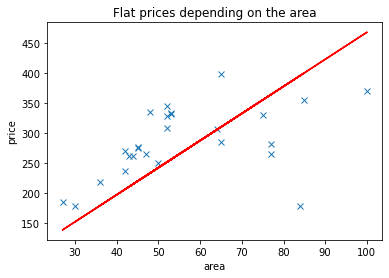

Computed weights -> w0: 17.6863687145744 w1: 4.500943779596619


In [7]:
predicted_prices = predict(sizes, weight0, weight1)

plt.plot(sizes, prices, "x")
plt.plot(sizes, predicted_prices, "r-")
plt.title('Flat prices depending on the area')
plt.xlabel('area')
plt.ylabel('price')
plt.show()
print("Computed weights -> w0:", weight0, "w1:", weight1)

## Task 3

The following piece of code draws charts of two different cost functions. The first chart presents mean squared error, the second one some arbitrary function.

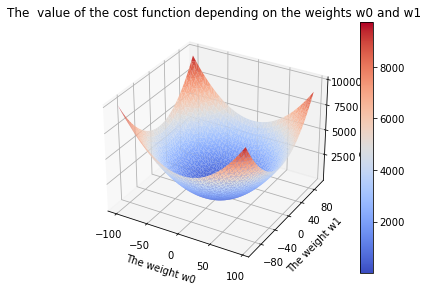

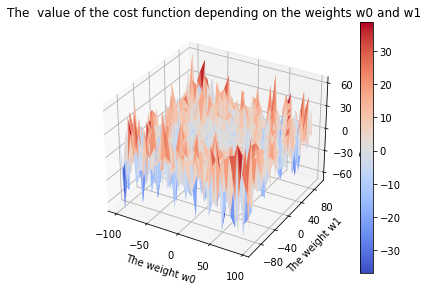

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def visualize_cost_function(sizes_transformed, prices_transformed, w0_values, w1_values, loss_function):
	points = []
	for i in w0_values:
	    for j in w1_values:
	        points.append([i, j, loss_function(sizes_transformed, prices_transformed, i,j)])
	points = np.array(points)

	Xs = points[:,0]
	Ys = points[:,1]
	Zs = points[:,2]

	fig = plt.figure()


	ax = fig.add_subplot(111, projection='3d')
	surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=plt.cm.coolwarm, linewidth=0)

	# 'The left and right margins cannot be made large' tight_layout fix
	for spine in ax.spines.values():
	    spine.set_visible(False)

	fig.colorbar(surf)
	ax.xaxis.set_major_locator(MaxNLocator(5))
	ax.yaxis.set_major_locator(MaxNLocator(6))
	ax.zaxis.set_major_locator(MaxNLocator(5))
	ax.set_title('The  value of the cost function depending on the weights w0 and w1')
	ax.set_zlabel('Cost function')
	ax.set_xlabel('The weight w0')
	ax.set_ylabel('The weight w1')
	fig.tight_layout()

	plt.show()     

def loss_function(sizes, prices, weight0, weight1):
    predictions = [weight0 + weight1*sizes[i] for i in range(len(prices))]
    return sum([(predictions[i] - prices[i])**2 for i in range(len(prices))])/(2*len(prices))


def loss_function2(sizes, prices, weight0, weight1):
    predictions = [weight0 + weight1*sizes[i] for i in range(len(prices))]
    return sum([(np.sin(predictions[i]/prices[i]**2) * (predictions[i]*prices[i]**3)) for i in range(len(prices))])/(2*len(prices))


w0_values = np.arange(-10, 10, 0.5)
w1_values = np.arange(-10, 10, 0.5)

sizes_transformed = ((sizes - np.mean(sizes)) / np.std(sizes)).reshape(-1)
prices_transformed = ((prices - np.mean(prices)) / np.std(prices)).reshape(-1)

w0_values = np.arange(-100, 100, 5)
w1_values = np.arange(-100, 100, 5)

visualize_cost_function(sizes_transformed, prices_transformed, w0_values, w1_values, loss_function)
visualize_cost_function(sizes_transformed, prices_transformed, w0_values, w1_values, loss_function2)

### Why the first one is preferred over the second one for learning with the gradient descent?

Because the 1t one is smooth and as just 1 minimum so we, whereever we "land" slope will lead us to global minumum. We just ned to adjust learning rate.
While 2nd one is periodic (sin) so it hhas lots of local minimums that we can get stuck in them. Also using term predictions*prices^3 will force our algorithm to keep predictions close to 0, even when they should be high.

### What makes a good cost function?

It should be smooth have the least amount of local minumum. It should be differentiable, wherever possible.  Making it periodick is usually a wrong decision ( I cannot think of an example where it could be periodic, but maybe sometimes it is usefull). It should also be easily computable and avoid terms tike predictions*prices because than setting all predictions to 0 makes error 0, which is not desired.

## Polynomial regression

The following piece of code draws the results of learning polynomial regression models with varying polynomial degree for the same data.

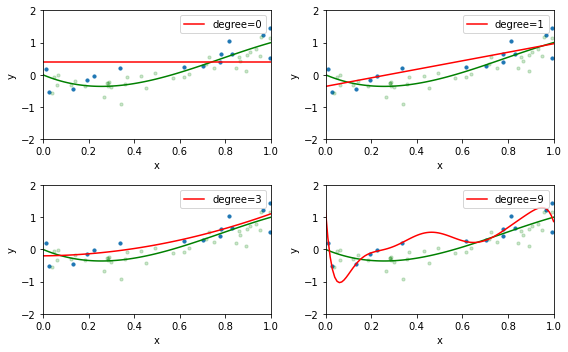

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# the ground truth - this is real function we'd like to uncover using polynomial regression. In a real situation this function is unknown.
def f(x): 
	return -(3*x)+(7*x**2)-(3*x**3)



X = np.random.uniform(0, 1, size=50)[:, np.newaxis] #sample 50 points from 0 to 1
y = f(X) + np.random.normal(scale=0.3, size=50)[:, np.newaxis] #generate labels for the randomly sampled points adding some Gaussian noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # split the data into a train and test subsets


# an auxiliary function to draw plots
def plot_approximation(est, ax, label=None):
    x = np.linspace(0,1,100) 
    ax.plot(x, f(x), color='green')
    ax.scatter(X_train, y_train, s=10)
    ax.scatter(X_test, y_test, s=10, color='green', alpha=0.2)
    ax.plot(x, est.predict(x[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')

# Use scikit-learn to generate polynomial regression models to draw detailed charts
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
for ax, degree in zip(axes.ravel(), [0, 1, 3, 9]):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    plot_approximation(est, ax, label='degree=%d' % degree)
plt.tight_layout()
plt.show()

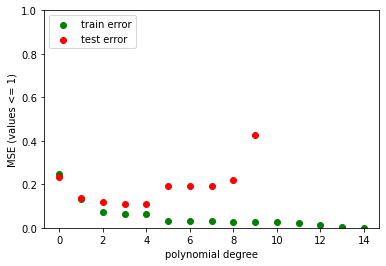

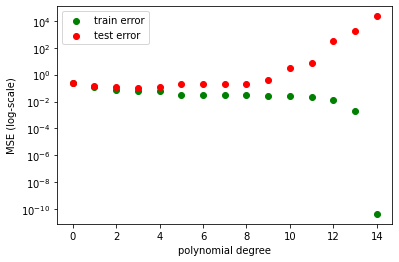

In [29]:
# Use scikit-learn to generate polynomial regression models to draw a summary chart
train_error = np.empty(15)
test_error = np.empty(15)
for degree in range(15):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))
    
    

plt.scatter(np.arange(15), train_error, color='green', label='train error')
plt.scatter(np.arange(15), test_error, color='red', label='test error')
plt.ylim((0.0, 1e0))
plt.ylabel('MSE (values <= 1)')
plt.xlabel('polynomial degree')
plt.legend(loc = 'upper left')
plt.show()

plt.scatter(np.arange(15), train_error, color='green', label='train error')
plt.scatter(np.arange(15), test_error, color='red', label='test error')
plt.yscale('log')
plt.ylabel('MSE (log-scale)')
plt.xlabel('polynomial degree')
plt.legend(loc = 'upper left')
plt.show()

## Task 4

For high enough degrees of the polynomial, the error on the test set increases. Why is that?

Because our model is really flexible to it has a high variance and instead of finding "general trend" for higher degrees it just tries to fit a line through all of the points in the training set. When it is given a test set, with points in did not see it turns out that they do not fit well into this really curvy line.

What is the purpose of using the test set?

Simply preventing overfitting your model. To test if algorithm has learned the general problem or just memorized examples.

## Task 5

Replace `LinearRegression` with `Ridge` and see how does using ridge regularization influences the error on the test set.
Observe the difference in the generated curves. Describe it, explain the reasons for it and comment whether the change is positive or negative.

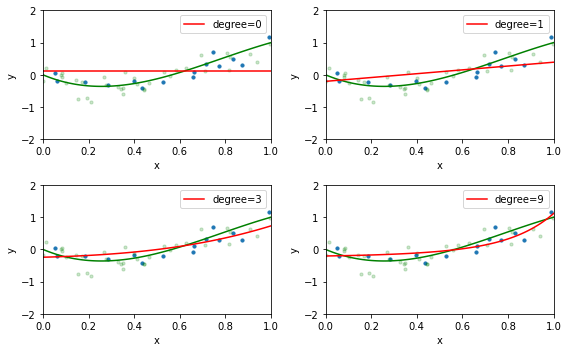

In [30]:

# the ground truth - this is real function we'd like to uncover using polynomial regression. In a real situation this function is unknown.
def f(x): 
	return -(3*x)+(7*x**2)-(3*x**3)



X = np.random.uniform(0, 1, size=50)[:, np.newaxis] #sample 50 points from 0 to 1
y = f(X) + np.random.normal(scale=0.3, size=50)[:, np.newaxis] #generate labels for the randomly sampled points adding some Gaussian noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # split the data into a train and test subsets


# an auxiliary function to draw plots
def plot_approximation(est, ax, label=None):
    x = np.linspace(0,1,100) 
    ax.plot(x, f(x), color='green')
    ax.scatter(X_train, y_train, s=10)
    ax.scatter(X_test, y_test, s=10, color='green', alpha=0.2)
    ax.plot(x, est.predict(x[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')

# Use scikit-learn to generate polynomial regression models to draw detailed charts
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
for ax, degree in zip(axes.ravel(), [0, 1, 3, 9]):
    est = make_pipeline(PolynomialFeatures(degree), Ridge())
    est.fit(X_train, y_train)
    plot_approximation(est, ax, label='degree=%d' % degree)
plt.tight_layout()
plt.show()

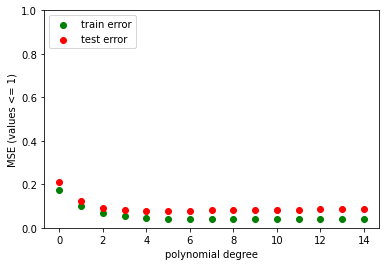

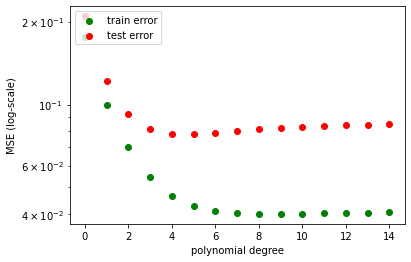

In [31]:
# Use scikit-learn to generate polynomial regression models to draw a summary chart
train_error = np.empty(15)
test_error = np.empty(15)
for degree in range(15):
    est = make_pipeline(PolynomialFeatures(degree), Ridge())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))
    
    

plt.scatter(np.arange(15), train_error, color='green', label='train error')
plt.scatter(np.arange(15), test_error, color='red', label='test error')
plt.ylim((0.0, 1e0))
plt.ylabel('MSE (values <= 1)')
plt.xlabel('polynomial degree')
plt.legend(loc = 'upper left')
plt.show()

plt.scatter(np.arange(15), train_error, color='green', label='train error')
plt.scatter(np.arange(15), test_error, color='red', label='test error')
plt.yscale('log')
plt.ylabel('MSE (log-scale)')
plt.xlabel('polynomial degree')
plt.legend(loc = 'upper left')
plt.show()

It looks that Ridge Regression made the test error decrease along with train error, so it prevented overfitting. However, the curve for degree 3 is too straight so decreasing the cooeficient alpha or increasing the number of points would be a good idea.
The reason for this is that Ridge penalizes for high coefficients so it prevent our curve from getting too curvy.
It my opinion the change is positive in general, but as always in Ridge regression we have to tweak the alpha parameter.